# Ensemble Learning 

Ensemble learning combines multiple models to improve prediction accuracy and robustness over single-model approaches. This technique leverages the diversity among models to overcome limitations like overfitting and bias.

## Key Techniques
- **Bagging**: Reduces variance by averaging predictions from models trained on different subsets.
- **Boosting**: Focuses on difficult cases by sequentially fitting models to weighted versions of the data.
- **Stacking**: Aggregates predictions from multiple models using a meta-learner.

## Advantages
- Enhances performance on complex tasks like image recognition and fraud detection.
- Balances bias and variance, reducing errors from individual models.

## Popular Algorithms
- **Random Forest**
- **AdaBoost**
- **Gradient Boosting Machines (GBM)**
- **XGBoost**

Ensemble methods are widely used due to their adaptability across different domains and superior prediction capabilities.


# Ensemble Learning for Bank Marketing

This notebook presents an ensemble learning approach applied to a bank marketing dataset. Ensemble methods combine multiple machine learning models to improve the overall predictive performance compared to a single model. We'll explore various ensemble techniques such as Bagging, Boosting, and Stacking to predict whether a customer will subscribe to a term deposit.

In [13]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.pipeline import Pipeline


## Load and Explore the Dataset

First, we load the dataset and perform a preliminary analysis to understand its structure.

In [20]:
# Load the dataset
data = pd.read_csv('C:/Users/78641/Downloads/bank-full.csv')

# Display the first few rows
print(data.head())


   age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome Target  
0  unknown    5   may       261         1     -1         0  unknown     no  
1  unknown    5   may       151         1     -1         0  unknown     no  
2  unknown    5   may        76         1     -1         0  unknown     no  
3  unknown    5   may        92         1     -1         0  unknown     no  
4  unknown    5   may       198         1     -1         0  unknown     no  


In [21]:
# Summary of the dataset
print(data.describe())

                age        balance           day      duration      campaign  \
count  45211.000000   45211.000000  45211.000000  45211.000000  45211.000000   
mean      40.936210    1362.272058     15.806419    258.163080      2.763841   
std       10.618762    3044.765829      8.322476    257.527812      3.098021   
min       18.000000   -8019.000000      1.000000      0.000000      1.000000   
25%       33.000000      72.000000      8.000000    103.000000      1.000000   
50%       39.000000     448.000000     16.000000    180.000000      2.000000   
75%       48.000000    1428.000000     21.000000    319.000000      3.000000   
max       95.000000  102127.000000     31.000000   4918.000000     63.000000   

              pdays      previous  
count  45211.000000  45211.000000  
mean      40.197828      0.580323  
std      100.128746      2.303441  
min       -1.000000      0.000000  
25%       -1.000000      0.000000  
50%       -1.000000      0.000000  
75%       -1.000000      0.

In [22]:
# Display the columns for sanity check
print(data.columns)

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'Target'],
      dtype='object')


## Data Preprocessing

Data preprocessing is necessary to convert categorical data into a format that can be provided to machine learning algorithms.


In [23]:
# Define the feature matrix X and target vector y
X = data.iloc[:, :-1]  # Assuming the last column is the target variable
y = data.iloc[:, -1].apply(lambda x: 1 if x.lower() == 'yes' else 0)

# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocessing pipelines for both numerical and categorical data
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'bool']).columns

numerical_transformer = StandardScaler()
categorical_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])

# Fitting the ColumnTransformer to the training data
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)




## Ensemble Learning Models

We will now apply various ensemble learning models to our preprocessed data.


In [24]:
# Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# AdaBoost Classifier
ada_model = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_model.fit(X_train, y_train)

# Gradient Boosting Classifier
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Stacking Classifier
estimators = [
    ('rf', RandomForestClassifier(n_estimators=10, random_state=42)),
    ('ada', AdaBoostClassifier(n_estimators=10, random_state=42))
]
stack_model = StackingClassifier(estimators=estimators, final_estimator=LogisticRegression())
stack_model.fit(X_train, y_train)


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=42)),
                               ('ada',
                                AdaBoostClassifier(n_estimators=10,
                                                   random_state=42))],
                   final_estimator=LogisticRegression())

## Model Evaluation

It's time to evaluate the performance of our ensemble models on the test set.


In [25]:
# Function to evaluate models
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    print("Model Evaluation Metrics:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("=====================================================\n")

# Evaluate each model
print("Random Forest Performance:")
evaluate_model(rf_model, X_test, y_test)

print("AdaBoost Performance:")
evaluate_model(ada_model, X_test, y_test)

print("Gradient Boosting Performance:")
evaluate_model(gb_model, X_test, y_test)

print("Stacking Performance:")
evaluate_model(stack_model, X_test, y_test)


Random Forest Performance:
Model Evaluation Metrics:
Accuracy: 0.9055623133915736
Confusion Matrix:
 [[7738  214]
 [ 640  451]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.68      0.41      0.51      1091

    accuracy                           0.91      9043
   macro avg       0.80      0.69      0.73      9043
weighted avg       0.89      0.91      0.90      9043


AdaBoost Performance:
Model Evaluation Metrics:
Accuracy: 0.9006966714585868
Confusion Matrix:
 [[7726  226]
 [ 672  419]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.95      7952
           1       0.65      0.38      0.48      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.68      0.71      9043
weighted avg       0.89      0.90      0.89      9043


Gradient Boosting Performance:
Model Evaluati

# Ensemble Models Performance Summary

The ensemble models were evaluated on their ability to predict customer subscription to term deposits in a bank marketing dataset. Below is a summary of their performance:

## Random Forest
- **Accuracy**: 90.56%
- High precision (92%) for non-subscribers indicates reliable negative predictions.
- Lower recall (41%) for subscribers points to missing a significant number of actual positive cases.
- The f1-score for subscribers (0.51) suggests room for improvement, particularly in recall.

## AdaBoost
- **Accuracy**: 90.07%
- Exhibited slightly lower accuracy than Random Forest.
- Showed consistent precision and recall figures for predicting non-subscribers but underperformed for subscribers, similar to Random Forest.

## Gradient Boosting
- **Accuracy**: 90.34%
- Slight improvement in accuracy compared to AdaBoost.
- Precision and recall for subscribers were marginally better than AdaBoost, indicating a slight increase in identifying actual subscribers.

## Stacking
- **Accuracy**: 89.94%
- Performed comparably with AdaBoost and Gradient Boosting in terms of precision and recall.
- Slightly lower accuracy suggests that the combination of base learners did not outperform individual models like Random Forest.

## Observations Across Models
- All models performed well in identifying non-subscribers but struggled to correctly predict actual subscribers.
- The f1-scores for the subscriber class across all models indicate that none of the models could capture the minority class effectively, which is a common challenge in imbalanced datasets.

## Conclusion
While the accuracy is high across the board, the ensemble models' ability to detect the positive class (subscribers) is an area that requires improvement. Considering the imbalance in the dataset, techniques such as oversampling the minority class or using specialized ensemble methods for imbalance might enhance the recall for the subscriber class.


## Actual vs Predicted Values Visualization

The bar chart below compares the actual and predicted values for the Random Forest model's ability to predict subscriptions to term deposits. Each class's count reflects the number of instances the model has predicted versus the true labels.

- **Blue Bars**: Indicate the actual number of instances for each class in the test set.
- **Orange Bars**: Indicate the predicted number of instances for each class.

This visualization is crucial to understand the model's performance in terms of false positives and false negatives, especially in a dataset where the classes may be imbalanced. If the bars for the positive class (Subscriber) show a marked difference, it might suggest the model is not as sensitive to detecting the minority class, which is a common issue in imbalanced datasets.


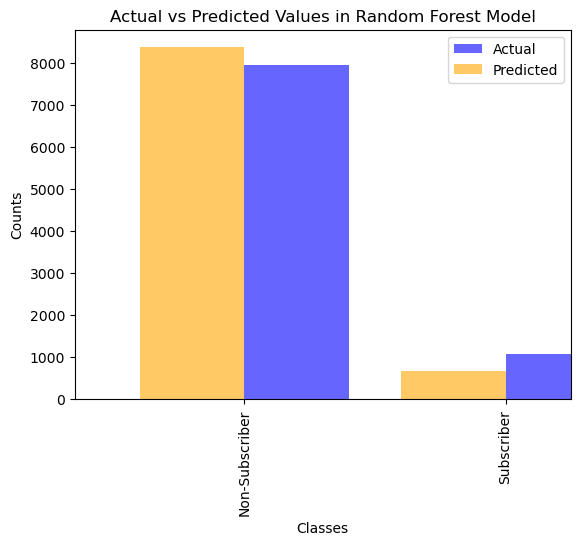

In [28]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert to pandas Series for convenience
y_pred = rf_model.predict(X_test)
y_test_series = pd.Series(y_test, name="Actual")
y_pred_series = pd.Series(y_pred, name="Predicted")

# Combine actual and predicted values into a DataFrame
df_actual_vs_predicted = pd.concat([y_test_series.reset_index(drop=True), 
                                    y_pred_series.reset_index(drop=True)], 
                                    axis=1)

# Calculate the value counts for actual and predicted
actual_counts = df_actual_vs_predicted['Actual'].value_counts().sort_index()
predicted_counts = df_actual_vs_predicted['Predicted'].value_counts().sort_index()

# Plotting
fig, ax = plt.subplots()
actual_counts.plot(kind='bar', color='blue', alpha=0.6, position=0, width=0.4, label='Actual', ax=ax)
predicted_counts.plot(kind='bar', color='orange', alpha=0.6, position=1, width=0.4, label='Predicted', ax=ax)

# Setting labels and titles
ax.set_xlabel('Classes')
ax.set_ylabel('Counts')
ax.set_title('Actual vs Predicted Values in Random Forest Model')
ax.set_xticks([0, 1])
ax.set_xticklabels(['Non-Subscriber', 'Subscriber'])
plt.legend()
plt.show()


## Actual vs Predicted Counts Analysis

The bar chart presents a comparison between the actual and predicted values generated by the Random Forest model:

- **Non-Subscriber Class (0)**:
  - The model has almost equal counts of actual and predicted values, indicating a high performance in identifying non-subscribers correctly.
  
- **Subscriber Class (1)**:
  - There is a notable difference between the actual and predicted counts for subscribers, with the predicted count being significantly lower.
  - This suggests that the model is conservative in predicting the positive class and might be prone to type II errors (false negatives), where actual subscribers are not being identified.

### Key Takeaways:
- The model is robust in predicting non-subscribers but could be improved in terms of sensitivity towards the subscriber class.
- Efforts to enhance model performance could include addressing class imbalance, feature engineering to highlight characteristics of subscribers, or tuning the model's hyperparameters to reduce the bias toward the majority class.
